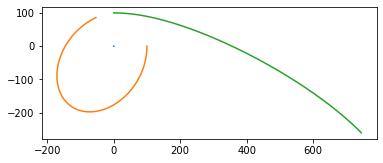

In [1]:
%matplotlib inline

from abc import ABC, abstractmethod
import numpy as np
from numpy import array as vec
import numpy.linalg
import matplotlib.pyplot as plt
import itertools

MODEL_G = 0.001  #благодаря этой штучке, у меня получились красивые линии, не знаю, надо было это делать или нет
COLLISION_DISTANCE = 5.0
COLLISION_COEFFICIENT = 50.0
MODEL_DELTA_T = 0.01
TIME_TO_MODEL = 100


class Universe(ABC):

    def __init__(self):
        self.bodies = []

    @abstractmethod
    def gravity_flow_dencity_per_1_1(self, dist):
    
        ...

    def model_step(self):
        for b1, b2 in itertools.product(self.bodies, self.bodies):
            if b1 != b2:
                b1.apply_force(b1.force_induced_by_other(b2))
        for b in self.bodies:
            b.advance()

    def add_body(self, body):
        self.bodies.append(body)


class MaterialPoint:

    
    def __init__(self, universe, mass, position, velocity):
        self.universe = universe
        self.mass = mass
        self.position = position
        self.velocity = velocity
        universe.add_body(self)

        self.ptrace = [self.position.copy()]
        self.vtrace = [self.velocity.copy()]
    
    def force_induced_by_other(self, other):
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass *\
                self.universe.gravity_flow_dencity_per_1_1(distance)
        return force

    def advance(self):
        self.position += self.velocity * MODEL_DELTA_T
        self.ptrace.append(self.position.copy())
        self.vtrace.append(self.velocity.copy())

    def apply_force(self, force):
        self.velocity += force * MODEL_DELTA_T / self.mass


class Universe2D(Universe):
    def __init__(self,
                 G,                  
                 k,                  
                 collision_distance  
                 ):
        super().__init__()
        self.G = G
        self.k = k
        self.collision_distance = collision_distance

    def gravity_flow_dencity_per_1_1(self, dist):
    
        if dist > self.collision_distance:
            
            return self.G / dist 
        else:
           
            return -self.k / dist 

u = Universe2D(MODEL_G, COLLISION_COEFFICIENT, COLLISION_DISTANCE)


bodies = [
    MaterialPoint(u, 50000., vec([  0.,   0.]), vec([ 0.,   0.])),
    MaterialPoint(u,     10., vec([100.,   0.]), vec([ 0., -10.])),
    MaterialPoint(u,     10., vec([  0., 100.]), vec([15.,   0.]))
]
    
steps = int(TIME_TO_MODEL / MODEL_DELTA_T)
for stepn in range(steps):
    u.model_step()


plt.gca().set_aspect('equal')

for b in bodies:
   
    plt.plot(*tuple(map(list, zip(*b.ptrace))))

plt.show();